In [1]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp



,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [4]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [6]:
tox_list=['BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
         ]

In [7]:
our_data=toxcast.reindex(columns=tox_list)

In [8]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def ErGFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetErGFingerprint(x))



In [10]:
from sklearn.feature_selection import VarianceThreshold



In [11]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [13]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [14]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [15]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [16]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [19]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


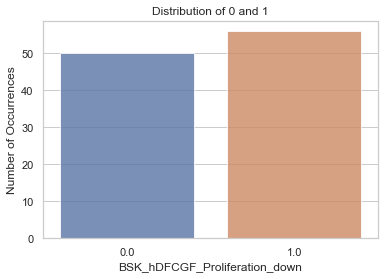

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   19.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   56.6s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  2]
 [ 0 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        10
         1.0       0.86      1.00      0.92        12

    accuracy                           0.91        22
   macro avg       0.93      0.90      0.91        22
weighted avg       0.92      0.91      0.91        22

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    5.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   18.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.0min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 5]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.64      0.82      0.72        11

    accuracy                           0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   54.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  5]
 [ 1 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.50      0.62        10
         1.0       0.67      0.91      0.77        11

    accuracy                           0.71        21
   macro avg       0.75      0.70      0.70        21
weighted avg       0.75      0.71      0.70        21

Total Selected train:  85
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.80      0.73      0.76        11

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21

Total Selected train:  85
Total Selected 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 7]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.30      0.37        10
         1.0       0.53      0.73      0.62        11

    accuracy                           0.52        21
   macro avg       0.52      0.51      0.50        21
weighted avg       0.52      0.52      0.50        21



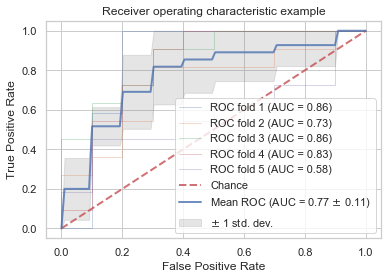

Mean of Each fold


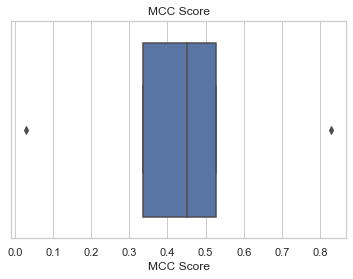

Matthews_corrcoef all:  [0.8280786712108251, 0.337099931231621, 0.45226701686664544, 0.5272727272727272, 0.03015113445777636]
Matthews_corrcoef mean:  0.4349738962079191


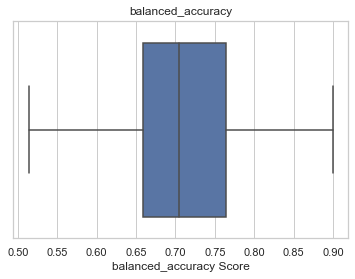

balanced_accuracy all:  [0.9, 0.6590909090909092, 0.7045454545454546, 0.7636363636363637, 0.5136363636363637]
balanced_accuracy mean:  0.7081818181818182


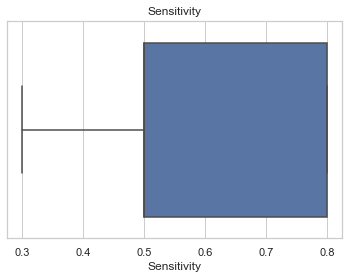

Sensitivity all:  [0.8, 0.5, 0.5, 0.8, 0.3]
Sensitivity mean:  0.58


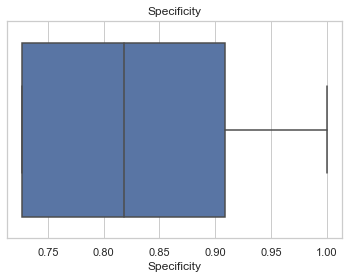

Specificity all:  [1.0, 0.8181818181818182, 0.9090909090909091, 0.7272727272727273, 0.7272727272727273]
Specificity mean:  0.8363636363636365
One Combined Confusion Matrix
conf_matrix: 
  [[29 21]
 [ 9 47]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        50
         1.0       0.69      0.84      0.76        56

    accuracy                           0.72       106
   macro avg       0.73      0.71      0.71       106
weighted avg       0.73      0.72      0.71       106

matthews_corrcoef
0.43645837016818884
balanced_accuracy_score
0.7096428571428571
Sensitivity
0.58
Specificity
0.8392857142857143
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.755


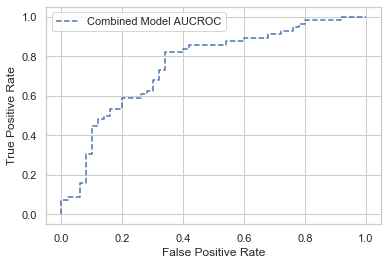

Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


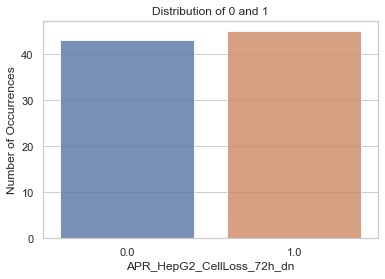

Total Compounds in Assay:  88
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 4]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.56      0.56         9
         1.0       0.56      0.56      0.56         9

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.56      0.56      0.56        18

Total Selected train:  70
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 4]
 [2 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.64      0.78      0.70         9

    accuracy                           0.67        18
   macro avg       0.68      0.67      0.66        18
weighted avg       0.68      0.67      0.66        18

Total Selected train:  70
Total Selected test:  1

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 3]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         9
         1.0       0.67      0.67      0.67         9

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.67        18
weighted avg       0.67      0.67      0.67        18

Total Selected train:  71
Total Selected test:  1

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.71      0.56      0.63         9

    accuracy                           0.65        17
   macro avg       0.66      0.65      0.65        17
weighted avg       0.66      0.65      0.64        17

Total Selected train:  71
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 4]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.50      0.53         8
         1.0       0.60      0.67      0.63         9

    accuracy                           0.59        17
   macro avg       0.59      0.58      0.58        17
weighted avg       0.59      0.59      0.59        17



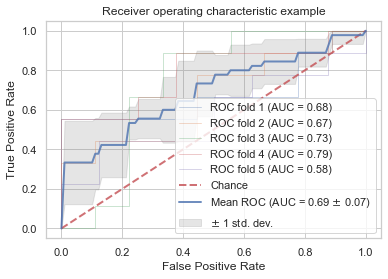

Mean of Each fold


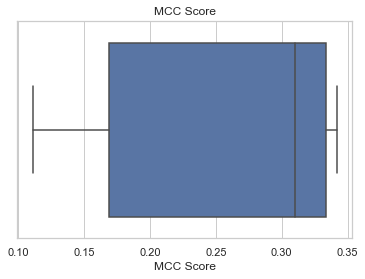

Matthews_corrcoef all:  [0.1111111111111111, 0.34188172937891387, 0.3333333333333333, 0.3098898934004561, 0.1690308509457033]
Matthews_corrcoef mean:  0.2530493836339035


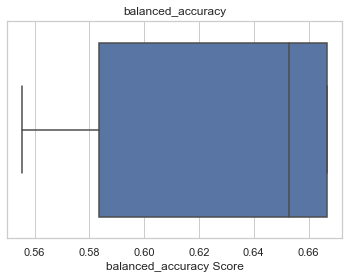

balanced_accuracy all:  [0.5555555555555556, 0.6666666666666667, 0.6666666666666666, 0.6527777777777778, 0.5833333333333333]
balanced_accuracy mean:  0.625


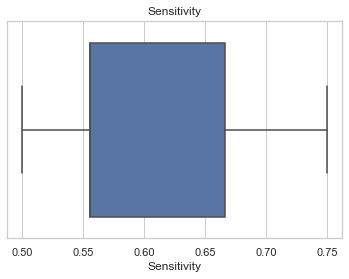

Sensitivity all:  [0.5555555555555556, 0.5555555555555556, 0.6666666666666666, 0.75, 0.5]
Sensitivity mean:  0.6055555555555555


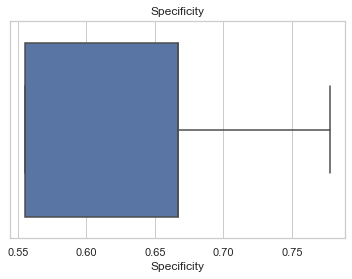

Specificity all:  [0.5555555555555556, 0.7777777777777778, 0.6666666666666666, 0.5555555555555556, 0.6666666666666666]
Specificity mean:  0.6444444444444444
One Combined Confusion Matrix
conf_matrix: 
  [[26 17]
 [16 29]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        43
         1.0       0.63      0.64      0.64        45

    accuracy                           0.62        88
   macro avg       0.62      0.62      0.62        88
weighted avg       0.62      0.62      0.62        88

matthews_corrcoef
0.24928892942740424
balanced_accuracy_score
0.6245478036175711
Sensitivity
0.6046511627906976
Specificity
0.6444444444444445
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6708010335917313


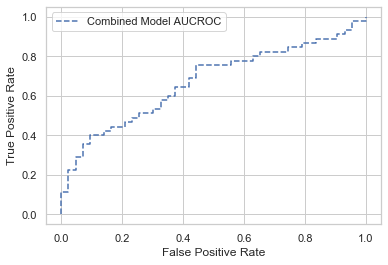

Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


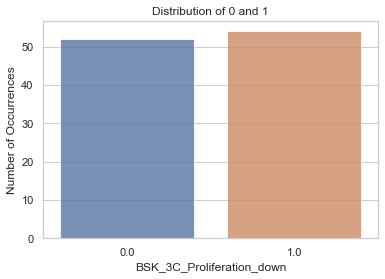

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [8 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.73      0.59        11
         1.0       0.50      0.27      0.35        11

    accuracy                           0.50        22
   macro avg       0.50      0.50      0.47        22
weighted avg       0.50      0.50      0.47        22

Total Selected train:  85
Total Selected test:  2

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.80      0.73      0.76        11

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21

Total Selected train:  85
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 5]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        10
         1.0       0.62      0.73      0.67        11

    accuracy                           0.62        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.62      0.62      0.61        21

Total Selected train:  85
Total Selected test:  21

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  5]
 [ 1 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.50      0.62        10
         1.0       0.67      0.91      0.77        11

    accuracy                           0.71        21
   macro avg       0.75      0.70      0.70        21
weighted avg       0.75      0.71      0.70        21

Total Selected train:  85
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [2 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.73      0.80      0.76        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21



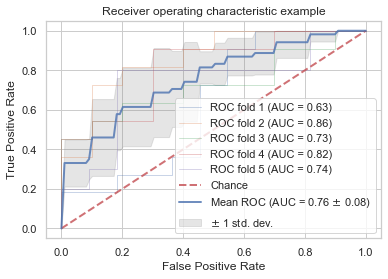

Mean of Each fold


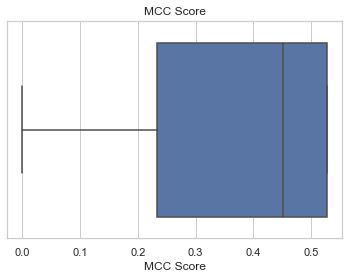

Matthews_corrcoef all:  [0.0, 0.5272727272727272, 0.2337367475021143, 0.45226701686664544, 0.5272727272727272]
Matthews_corrcoef mean:  0.3481098437828428


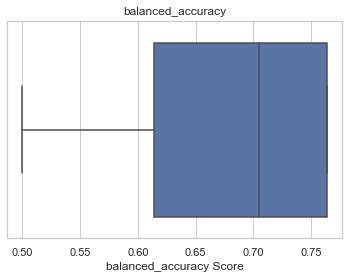

balanced_accuracy all:  [0.5, 0.7636363636363637, 0.6136363636363636, 0.7045454545454546, 0.7636363636363637]
balanced_accuracy mean:  0.6690909090909092


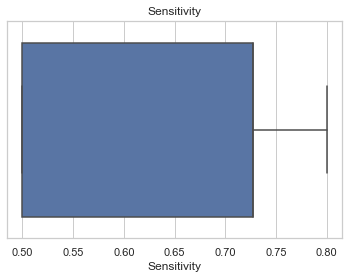

Sensitivity all:  [0.7272727272727273, 0.8, 0.5, 0.5, 0.7272727272727273]
Sensitivity mean:  0.650909090909091


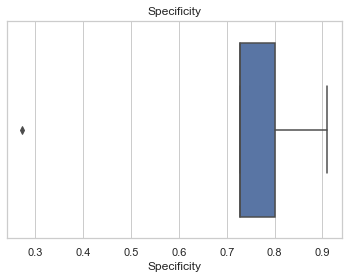

Specificity all:  [0.2727272727272727, 0.7272727272727273, 0.7272727272727273, 0.9090909090909091, 0.8]
Specificity mean:  0.6872727272727273
One Combined Confusion Matrix
conf_matrix: 
  [[34 18]
 [17 37]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.65      0.66        52
         1.0       0.67      0.69      0.68        54

    accuracy                           0.67       106
   macro avg       0.67      0.67      0.67       106
weighted avg       0.67      0.67      0.67       106

matthews_corrcoef
0.3392125907625606
balanced_accuracy_score
0.6695156695156695
Sensitivity
0.6538461538461539
Specificity
0.6851851851851852
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.751068376068376


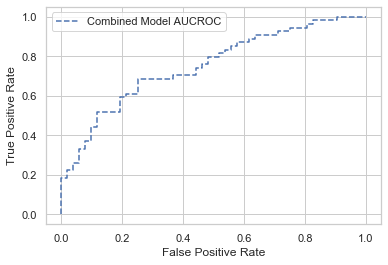

Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


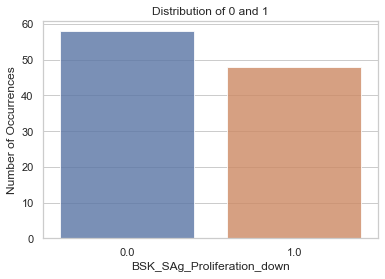

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [4 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        12
         1.0       0.60      0.60      0.60        10

    accuracy                           0.64        22
   macro avg       0.63      0.63      0.63        22
weighted avg       0.64      0.64      0.64        22

Total Selected train:  85
Total Selected test:  21

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 2]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.82      0.69        11
         1.0       0.67      0.40      0.50        10

    accuracy                           0.62        21
   macro avg       0.63      0.61      0.60        21
weighted avg       0.63      0.62      0.60        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   26.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.64      0.61        11
         1.0       0.56      0.50      0.53        10

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21

Total Selected train:  85
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.50      0.44      0.47         9

    accuracy                           0.57        21
   macro avg       0.56      0.56      0.56        21
weighted avg       0.57      0.57      0.57        21

Total Selected train:  85
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        12
         1.0       0.60      0.67      0.63         9

    accuracy                           0.67        21
   macro avg       0.66      0.67      0.66        21
weighted avg       0.67      0.67      0.67        21



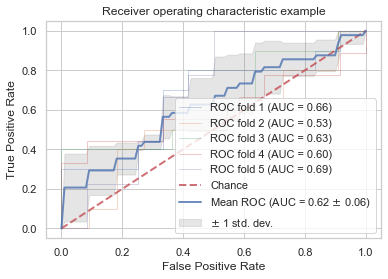

Mean of Each fold


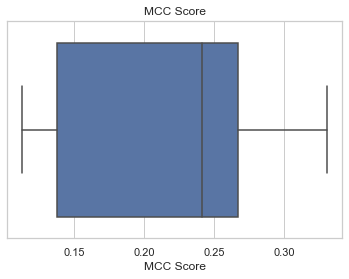

Matthews_corrcoef all:  [0.26666666666666666, 0.2412090756622109, 0.13762047064079508, 0.11322770341445958, 0.3302891295379082]
Matthews_corrcoef mean:  0.21780260918440808


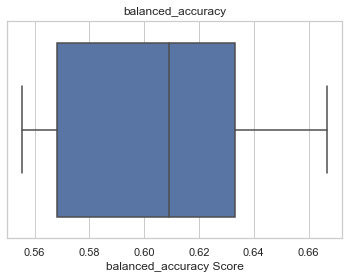

balanced_accuracy all:  [0.6333333333333333, 0.6090909090909091, 0.5681818181818181, 0.5555555555555556, 0.6666666666666666]
balanced_accuracy mean:  0.6065656565656565


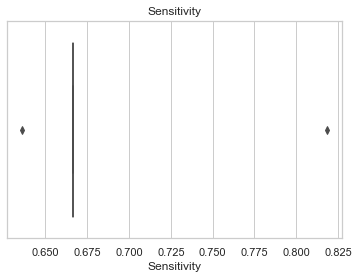

Sensitivity all:  [0.6666666666666666, 0.8181818181818182, 0.6363636363636364, 0.6666666666666666, 0.6666666666666666]
Sensitivity mean:  0.6909090909090908


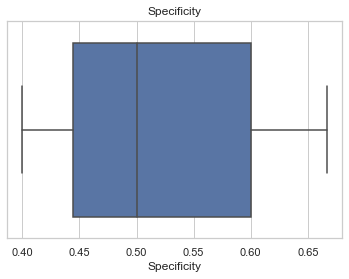

Specificity all:  [0.6, 0.4, 0.5, 0.4444444444444444, 0.6666666666666666]
Specificity mean:  0.5222222222222223
One Combined Confusion Matrix
conf_matrix: 
  [[40 18]
 [23 25]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.63      0.69      0.66        58
         1.0       0.58      0.52      0.55        48

    accuracy                           0.61       106
   macro avg       0.61      0.61      0.61       106
weighted avg       0.61      0.61      0.61       106

matthews_corrcoef
0.21338235210627962
balanced_accuracy_score
0.6052442528735633
Sensitivity
0.6896551724137931
Specificity
0.5208333333333334
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6332614942528735


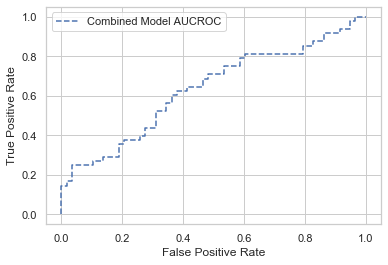

Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


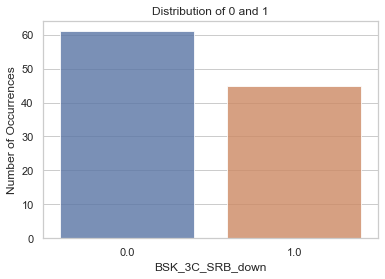

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 6]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.54      0.54      0.54        13
         1.0       0.33      0.33      0.33         9

    accuracy                           0.45        22
   macro avg       0.44      0.44      0.44        22
weighted avg       0.45      0.45      0.45        22

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        12
         1.0       0.50      0.56      0.53         9

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.58      0.57      0.57        21

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.75      0.67        12
         1.0       0.50      0.33      0.40         9

    accuracy                           0.57        21
   macro avg       0.55      0.54      0.53        21
weighted avg       0.56      0.57      0.55        21

Total Selected train:  85
Total Selected test:  21

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        12
         1.0       0.56      0.56      0.56         9

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21

Total Selected train:  85
Total Selected test:  2

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [7 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.75      0.64        12
         1.0       0.40      0.22      0.29         9

    accuracy                           0.52        21
   macro avg       0.48      0.49      0.46        21
weighted avg       0.49      0.52      0.49        21



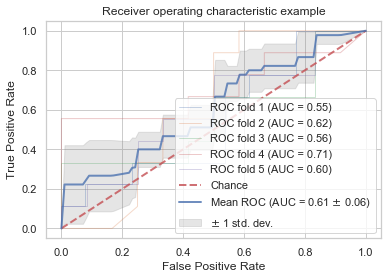

Mean of Each fold


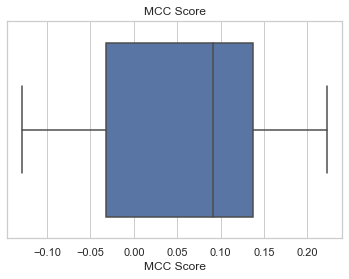

Matthews_corrcoef all:  [-0.1282051282051282, 0.13762047064079508, 0.09128709291752768, 0.2222222222222222, -0.032274861218395144]
Matthews_corrcoef mean:  0.05812995927140433


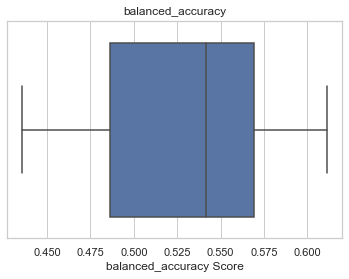

balanced_accuracy all:  [0.4358974358974359, 0.5694444444444444, 0.5416666666666666, 0.6111111111111112, 0.4861111111111111]
balanced_accuracy mean:  0.5288461538461539


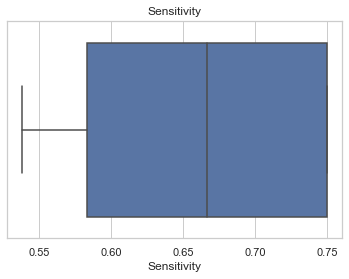

Sensitivity all:  [0.5384615384615384, 0.5833333333333334, 0.75, 0.6666666666666666, 0.75]
Sensitivity mean:  0.6576923076923077


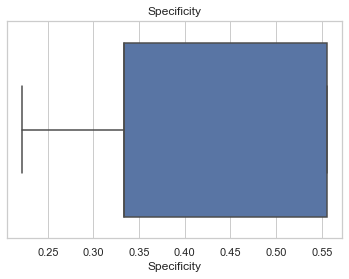

Specificity all:  [0.3333333333333333, 0.5555555555555556, 0.3333333333333333, 0.5555555555555556, 0.2222222222222222]
Specificity mean:  0.4
One Combined Confusion Matrix
conf_matrix: 
  [[40 21]
 [27 18]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.66      0.62        61
         1.0       0.46      0.40      0.43        45

    accuracy                           0.55       106
   macro avg       0.53      0.53      0.53       106
weighted avg       0.54      0.55      0.54       106

matthews_corrcoef
0.057128201456285436
balanced_accuracy_score
0.5278688524590164
Sensitivity
0.6557377049180327
Specificity
0.4
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6131147540983607


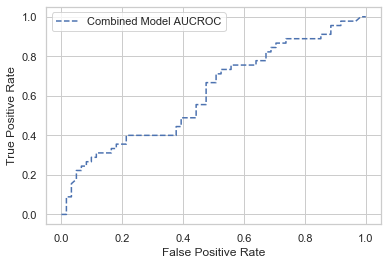

Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


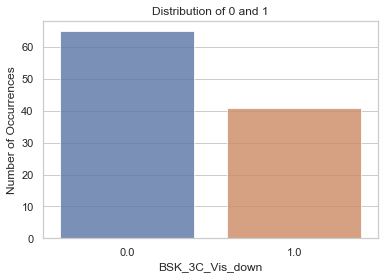

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 7  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.77      0.67        13
         1.0       0.40      0.22      0.29         9

    accuracy                           0.55        22
   macro avg       0.49      0.50      0.48        22
weighted avg       0.51      0.55      0.51        22

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        13
         1.0       0.80      0.50      0.62         8

    accuracy                           0.76        21
   macro avg       0.78      0.71      0.72        21
weighted avg       0.77      0.76      0.75        21

Total Selected train:  85
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.85      0.73        13
         1.0       0.50      0.25      0.33         8

    accuracy                           0.62        21
   macro avg       0.57      0.55      0.53        21
weighted avg       0.59      0.62      0.58        21

Total Selected train:  85
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 8  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        13
         1.0       0.62      0.62      0.62         8

    accuracy                           0.71        21
   macro avg       0.70      0.70      0.70        21
weighted avg       0.71      0.71      0.71        21



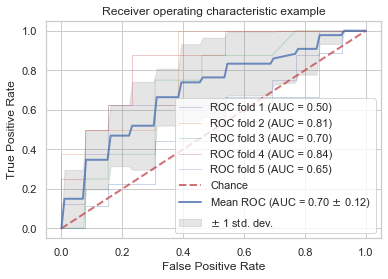

Mean of Each fold


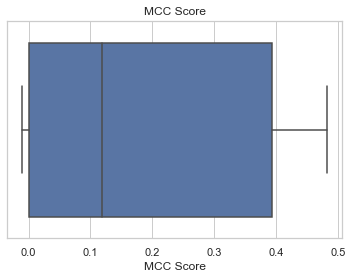

Matthews_corrcoef all:  [-0.010027613959936446, 0.4823819106188661, 0.11891287353862351, 0.0, 0.3942307692307692]
Matthews_corrcoef mean:  0.19709958788566445


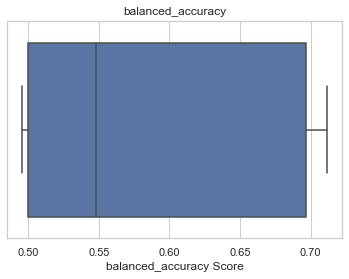

balanced_accuracy all:  [0.49572649572649574, 0.7115384615384616, 0.5480769230769231, 0.5, 0.6971153846153846]
balanced_accuracy mean:  0.5904914529914531


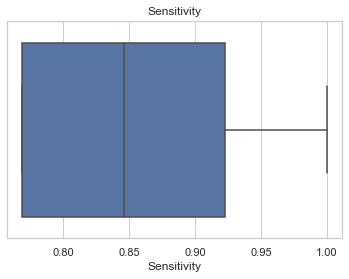

Sensitivity all:  [0.7692307692307693, 0.9230769230769231, 0.8461538461538461, 1.0, 0.7692307692307693]
Sensitivity mean:  0.8615384615384617


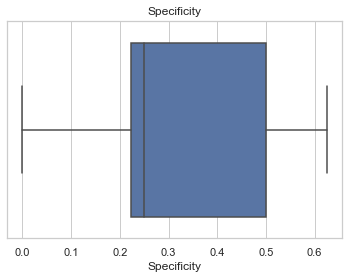

Specificity all:  [0.2222222222222222, 0.5, 0.25, 0.0, 0.625]
Specificity mean:  0.3194444444444445
One Combined Confusion Matrix
conf_matrix: 
  [[56  9]
 [28 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        65
         1.0       0.59      0.32      0.41        41

    accuracy                           0.65       106
   macro avg       0.63      0.59      0.58       106
weighted avg       0.64      0.65      0.62       106

matthews_corrcoef
0.21449015477133532
balanced_accuracy_score
0.5893058161350845
Sensitivity
0.8615384615384616
Specificity
0.3170731707317073
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6711069418386492


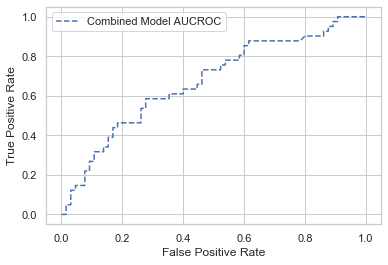

Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


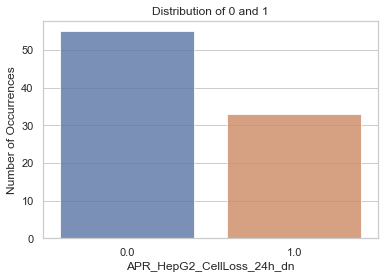

Total Compounds in Assay:  88
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        11
         1.0       1.00      0.14      0.25         7

    accuracy                           0.67        18
   macro avg       0.82      0.57      0.52        18
weighted avg       0.78      0.67      0.58        18

Total Selected train:  70
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 2]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        11
         1.0       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.62        18
weighted avg       0.66      0.67      0.65        18

Total Selected train:  70
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 2]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.82      0.72        11
         1.0       0.50      0.29      0.36         7

    accuracy                           0.61        18
   macro avg       0.57      0.55      0.54        18
weighted avg       0.59      0.61      0.58        18

Total Selected train:  71
Total Selected test:  17

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [3 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.73      0.73        11
         1.0       0.50      0.50      0.50         6

    accuracy                           0.65        17
   macro avg       0.61      0.61      0.61        17
weighted avg       0.65      0.65      0.65        17

Total Selected train:  71
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 2]
 [3 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        11
         1.0       0.60      0.50      0.55         6

    accuracy                           0.71        17
   macro avg       0.68      0.66      0.66        17
weighted avg       0.70      0.71      0.70        17



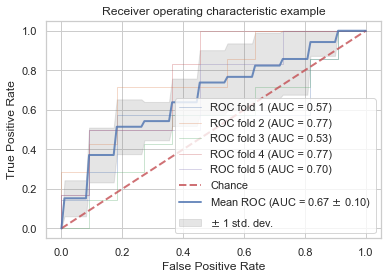

Mean of Each fold


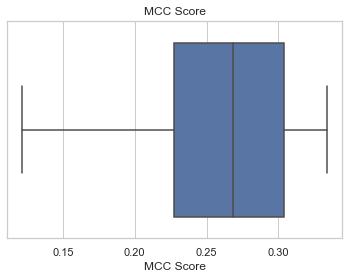

Matthews_corrcoef all:  [0.30403449605253013, 0.26856632724128343, 0.12182898077463453, 0.22727272727272727, 0.3337119062359573]
Matthews_corrcoef mean:  0.25108288751542657


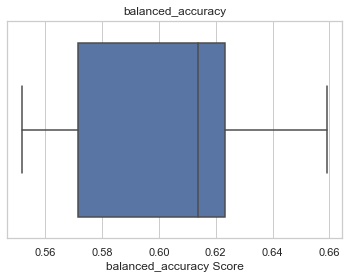

balanced_accuracy all:  [0.5714285714285714, 0.6233766233766234, 0.551948051948052, 0.6136363636363636, 0.6590909090909092]
balanced_accuracy mean:  0.6038961038961039


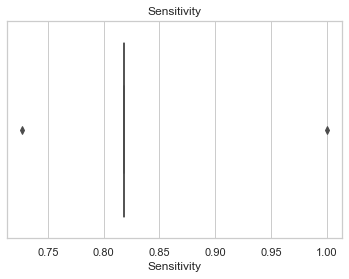

Sensitivity all:  [1.0, 0.8181818181818182, 0.8181818181818182, 0.7272727272727273, 0.8181818181818182]
Sensitivity mean:  0.8363636363636365


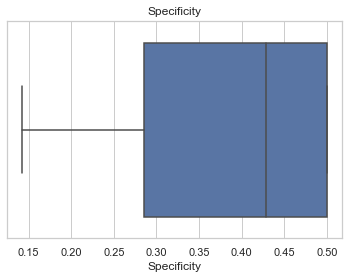

Specificity all:  [0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.5, 0.5]
Specificity mean:  0.37142857142857144
One Combined Confusion Matrix
conf_matrix: 
  [[46  9]
 [21 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.84      0.75        55
         1.0       0.57      0.36      0.44        33

    accuracy                           0.66        88
   macro avg       0.63      0.60      0.60        88
weighted avg       0.64      0.66      0.64        88

matthews_corrcoef
0.22715445653021024
balanced_accuracy_score
0.6
Sensitivity
0.8363636363636363
Specificity
0.36363636363636365
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6782369146005509


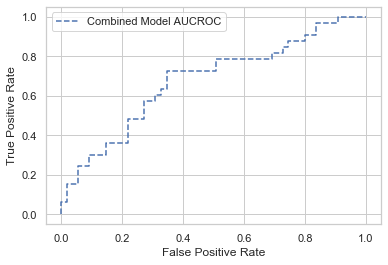

Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


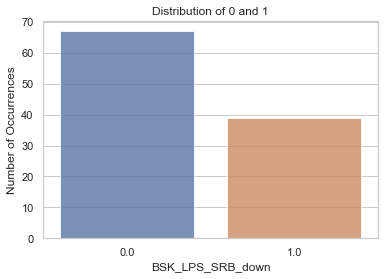

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  4]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        14
         1.0       0.50      0.50      0.50         8

    accuracy                           0.64        22
   macro avg       0.61      0.61      0.61        22
weighted avg       0.64      0.64      0.64        22

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.77      0.71        13
         1.0       0.50      0.38      0.43         8

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21

Total Selected train:  85
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.85      0.76        13
         1.0       0.60      0.38      0.46         8

    accuracy                           0.67        21
   macro avg       0.64      0.61      0.61        21
weighted avg       0.65      0.67      0.65        21

Total Selected train:  85
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        13
         1.0       0.75      0.38      0.50         8

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  4]
 [ 1  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.91      0.71      0.80        14
         1.0       0.60      0.86      0.71         7

    accuracy                           0.76        21
   macro avg       0.75      0.79      0.75        21
weighted avg       0.81      0.76      0.77        21



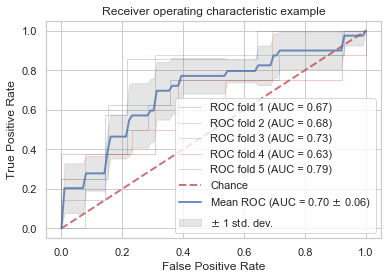

Mean of Each fold


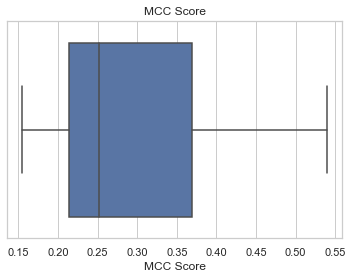

Matthews_corrcoef all:  [0.21428571428571427, 0.15504341823651058, 0.25215418055077093, 0.3686299079697329, 0.5393598899705937]
Matthews_corrcoef mean:  0.3058946222026645


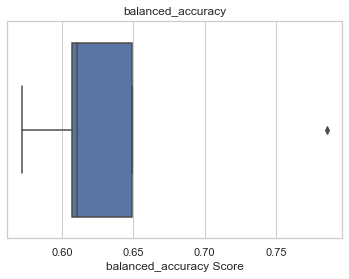

balanced_accuracy all:  [0.6071428571428572, 0.5721153846153846, 0.6105769230769231, 0.6490384615384616, 0.7857142857142857]
balanced_accuracy mean:  0.6449175824175823


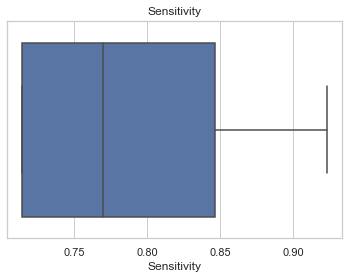

Sensitivity all:  [0.7142857142857143, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 0.7142857142857143]
Sensitivity mean:  0.7934065934065935


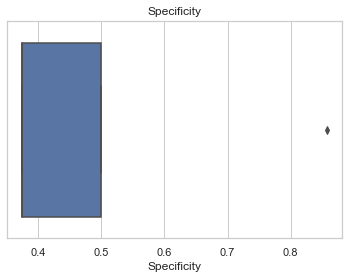

Specificity all:  [0.5, 0.375, 0.375, 0.375, 0.8571428571428571]
Specificity mean:  0.49642857142857144
One Combined Confusion Matrix
conf_matrix: 
  [[53 14]
 [20 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        67
         1.0       0.58      0.49      0.53        39

    accuracy                           0.68       106
   macro avg       0.65      0.64      0.64       106
weighted avg       0.67      0.68      0.67       106

matthews_corrcoef
0.28976525290753324
balanced_accuracy_score
0.639112131649445
Sensitivity
0.7910447761194029
Specificity
0.48717948717948717
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6934557979334098


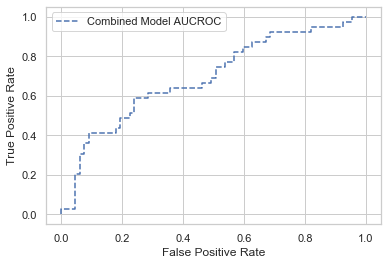

Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


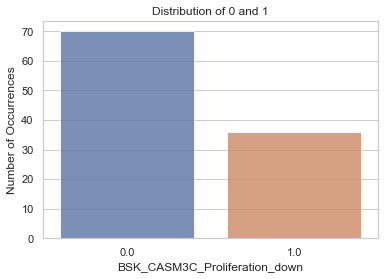

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.83      0.62      0.71         8

    accuracy                           0.82        22
   macro avg       0.82      0.78      0.79        22
weighted avg       0.82      0.82      0.81        22

Total Selected train:  85
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.80      0.57      0.67         7

    accuracy                           0.81        21
   macro avg       0.81      0.75      0.77        21
weighted avg       0.81      0.81      0.80        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 2  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        14
         1.0       0.62      0.71      0.67         7

    accuracy                           0.76        21
   macro avg       0.74      0.75      0.74        21
weighted avg       0.77      0.76      0.77        21

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 5]
 [1 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.90      0.64      0.75        14
         1.0       0.55      0.86      0.67         7

    accuracy                           0.71        21
   macro avg       0.72      0.75      0.71        21
weighted avg       0.78      0.71      0.72        21



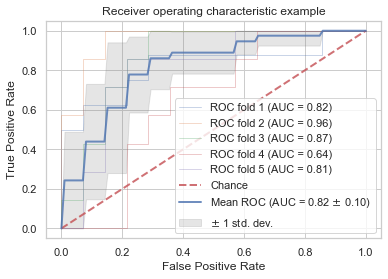

Mean of Each fold


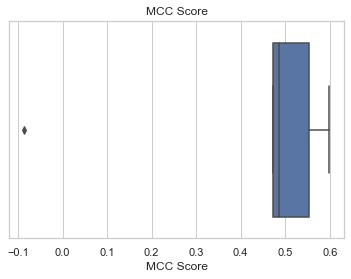

Matthews_corrcoef all:  [0.5979254811031062, 0.5533985905294664, 0.4853626716970755, -0.08574929257125442, 0.47193990372426947]
Matthews_corrcoef mean:  0.4045754708965326


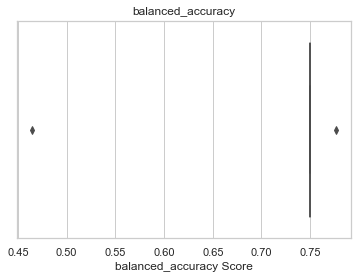

balanced_accuracy all:  [0.7767857142857143, 0.75, 0.75, 0.4642857142857143, 0.75]
balanced_accuracy mean:  0.6982142857142858


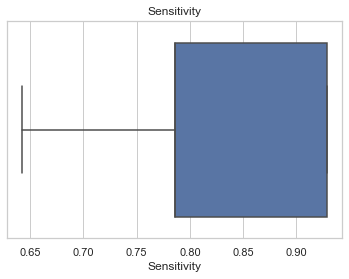

Sensitivity all:  [0.9285714285714286, 0.9285714285714286, 0.7857142857142857, 0.7857142857142857, 0.6428571428571429]
Sensitivity mean:  0.8142857142857143


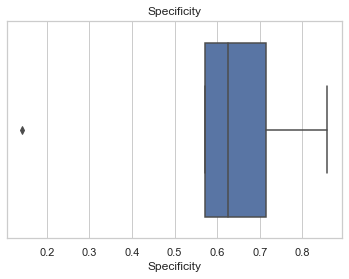

Specificity all:  [0.625, 0.5714285714285714, 0.7142857142857143, 0.14285714285714285, 0.8571428571428571]
Specificity mean:  0.5821428571428571
One Combined Confusion Matrix
conf_matrix: 
  [[57 13]
 [15 21]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        70
         1.0       0.62      0.58      0.60        36

    accuracy                           0.74       106
   macro avg       0.70      0.70      0.70       106
weighted avg       0.73      0.74      0.73       106

matthews_corrcoef
0.40342401230816205
balanced_accuracy_score
0.6988095238095238
Sensitivity
0.8142857142857143
Specificity
0.5833333333333334
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.8087301587301587


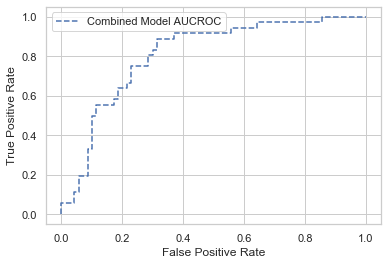

Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


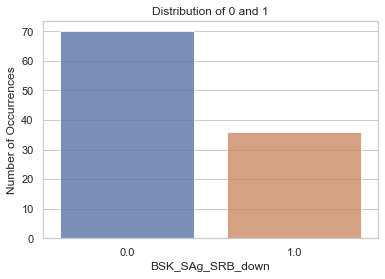

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 8  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        14
         1.0       0.00      0.00      0.00         8

    accuracy                           0.64        22
   macro avg       0.32      0.50      0.39        22
weighted avg       0.40      0.64      0.49        22



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  4]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        14
         1.0       0.43      0.43      0.43         7

    accuracy                           0.62        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.62      0.62      0.62        21

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.75      0.43      0.55         7

    accuracy                           0.76        21
   macro avg       0.76      0.68      0.69        21
weighted avg       0.76      0.76      0.74        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 5]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69        14
         1.0       0.44      0.57      0.50         7

    accuracy                           0.62        21
   macro avg       0.60      0.61      0.60        21
weighted avg       0.65      0.62      0.63        21



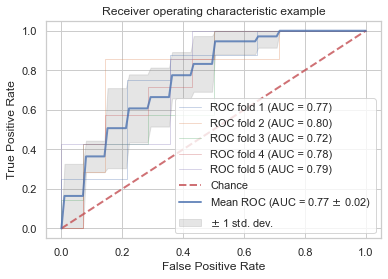

Mean of Each fold


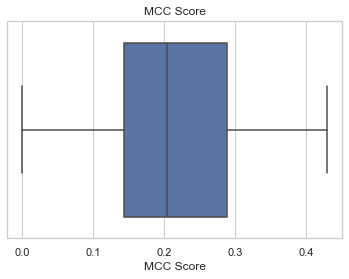

Matthews_corrcoef all:  [0.0, 0.28867513459481287, 0.14285714285714285, 0.4287464628562721, 0.2041241452319315]
Matthews_corrcoef mean:  0.21288057710803185


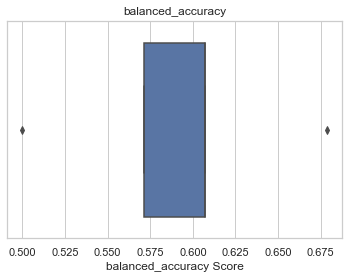

balanced_accuracy all:  [0.5, 0.6071428571428572, 0.5714285714285714, 0.6785714285714286, 0.6071428571428572]
balanced_accuracy mean:  0.5928571428571429


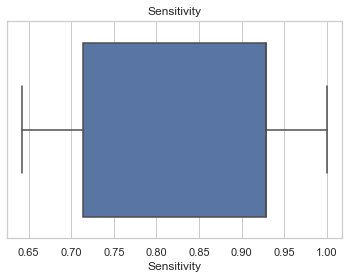

Sensitivity all:  [1.0, 0.9285714285714286, 0.7142857142857143, 0.9285714285714286, 0.6428571428571429]
Sensitivity mean:  0.8428571428571429


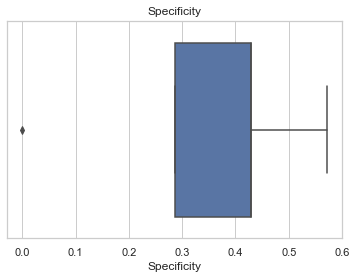

Specificity all:  [0.0, 0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.5714285714285714]
Specificity mean:  0.34285714285714286
One Combined Confusion Matrix
conf_matrix: 
  [[59 11]
 [24 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        70
         1.0       0.52      0.33      0.41        36

    accuracy                           0.67       106
   macro avg       0.62      0.59      0.59       106
weighted avg       0.65      0.67      0.65       106

matthews_corrcoef
0.20243226551313714
balanced_accuracy_score
0.5880952380952381
Sensitivity
0.8428571428571429
Specificity
0.3333333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7218253968253968


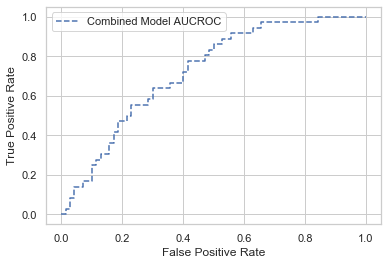

Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


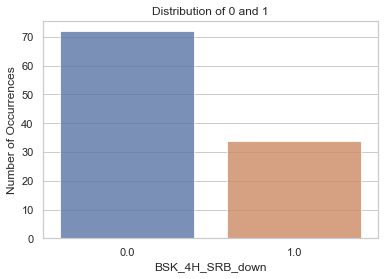

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.87      0.79        15
         1.0       0.50      0.29      0.36         7

    accuracy                           0.68        22
   macro avg       0.61      0.58      0.58        22
weighted avg       0.65      0.68      0.65        22

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        14
         1.0       1.00      0.14      0.25         7

    accuracy                           0.71        21
   macro avg       0.85      0.57      0.54        21
weighted avg       0.80      0.71      0.63        21

Total Selected train:  85
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        14
         1.0       0.67      0.57      0.62         7

    accuracy                           0.76        21
   macro avg       0.73      0.71      0.72        21
weighted avg       0.76      0.76      0.76        21

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        15
         1.0       0.67      0.33      0.44         6

    accuracy                           0.76        21
   macro avg       0.72      0.63      0.65        21
weighted avg       0.75      0.76      0.73        21



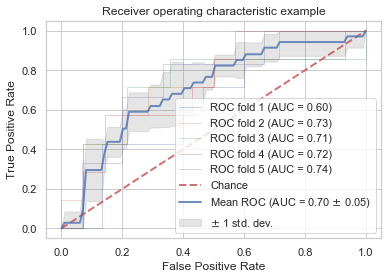

Mean of Each fold


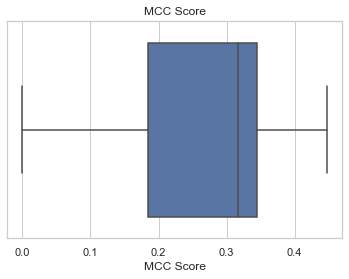

Matthews_corrcoef all:  [0.18401748249129446, 0.31622776601683794, 0.0, 0.4472135954999579, 0.3442651863295482]
Matthews_corrcoef mean:  0.2583448060675277


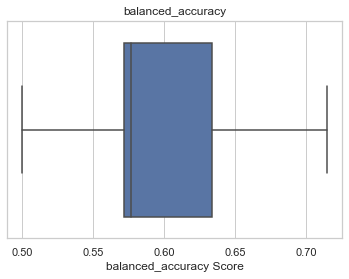

balanced_accuracy all:  [0.5761904761904761, 0.5714285714285714, 0.5, 0.7142857142857142, 0.6333333333333333]
balanced_accuracy mean:  0.5990476190476189


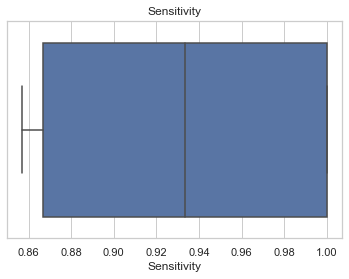

Sensitivity all:  [0.8666666666666667, 1.0, 1.0, 0.8571428571428571, 0.9333333333333333]
Sensitivity mean:  0.9314285714285715


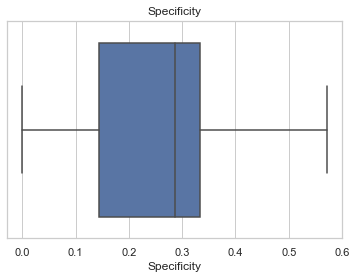

Specificity all:  [0.2857142857142857, 0.14285714285714285, 0.0, 0.5714285714285714, 0.3333333333333333]
Specificity mean:  0.26666666666666666
One Combined Confusion Matrix
conf_matrix: 
  [[67  5]
 [25  9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        72
         1.0       0.64      0.26      0.37        34

    accuracy                           0.72       106
   macro avg       0.69      0.60      0.60       106
weighted avg       0.70      0.72      0.68       106

matthews_corrcoef
0.2691933073821365
balanced_accuracy_score
0.5976307189542484
Sensitivity
0.9305555555555556
Specificity
0.2647058823529412
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.698937908496732


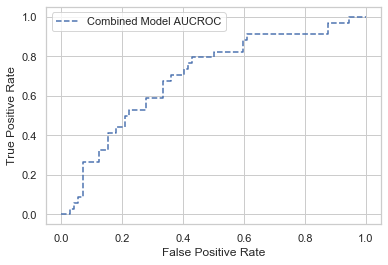

Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


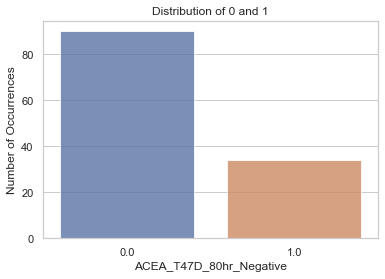

Total Compounds in Assay:  124
Total Selected train:  99
Total Selected test:  25
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  4]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.78      0.76        18
         1.0       0.33      0.29      0.31         7

    accuracy                           0.64        25
   macro avg       0.54      0.53      0.53        25
weighted avg       0.62      0.64      0.63        25

Total Selected train:  99
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        18
         1.0       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25

Total Selected train:  99
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        18
         1.0       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25

Total Selected train:  99
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        18
         1.0       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  100
Total Selected test:  24
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  2]
 [ 5  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        18
         1.0       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



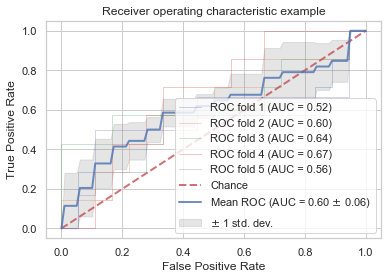

Mean of Each fold


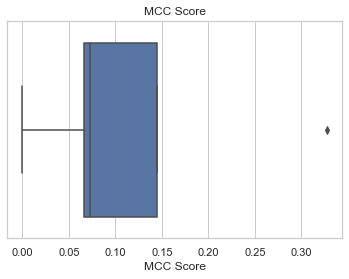

Matthews_corrcoef all:  [0.06675015657623451, 0.1444869078105018, 0.32732683535398854, 0.0, 0.07273929674533079]
Matthews_corrcoef mean:  0.12226063929721112


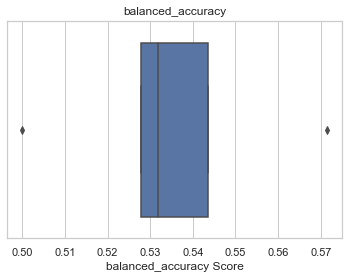

balanced_accuracy all:  [0.5317460317460317, 0.5436507936507936, 0.5714285714285714, 0.5, 0.5277777777777778]
balanced_accuracy mean:  0.5349206349206349


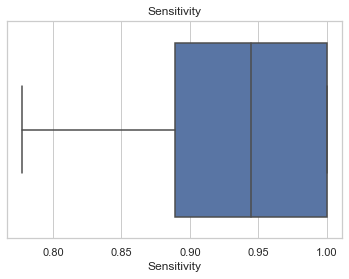

Sensitivity all:  [0.7777777777777778, 0.9444444444444444, 1.0, 1.0, 0.8888888888888888]
Sensitivity mean:  0.9222222222222222


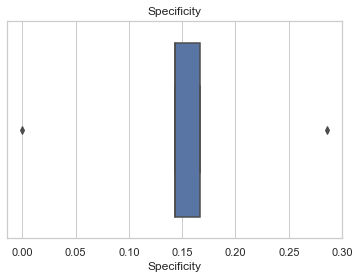

Specificity all:  [0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.0, 0.16666666666666666]
Specificity mean:  0.1476190476190476
One Combined Confusion Matrix
conf_matrix: 
  [[83  7]
 [29  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.92      0.82        90
         1.0       0.42      0.15      0.22        34

    accuracy                           0.71       124
   macro avg       0.58      0.53      0.52       124
weighted avg       0.65      0.71      0.66       124

matthews_corrcoef
0.10453831925646248
balanced_accuracy_score
0.534640522875817
Sensitivity
0.9222222222222223
Specificity
0.14705882352941177
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5934640522875817


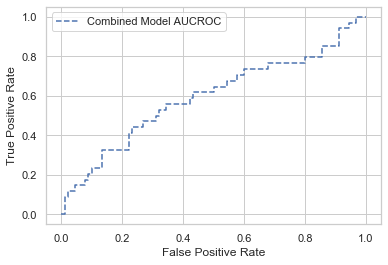

In [22]:
list_of_lists = []

for col in tox_list:
    
    method = "ErG"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    target=col
    
    
    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['ErGFingerprint'] =df_temp['smiles_r'].apply(ErGFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)

    X = np.array([x for x in df_temp['ErGFingerprint']])
    
    df_temp=df_temp.drop('ErGFingerprint', axis = 1)
    data=df_temp
    
    data=data.drop('smiles_r', axis = 1)
    y = data[target]

    y=y.to_numpy()
    
    print("Total Compounds in Assay: ", len(X))
       
    outercv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
           
        param_grid= { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }
        
       # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs = 40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    print("Mean of Each fold")
       
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print("Matthews_corrcoef mean: ", np.mean(mat_cof))
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print("balanced_accuracy mean: ", np.mean(ba))
        
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print("Sensitivity mean: ", np.mean(sen))
        
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print("Specificity mean: ", np.mean(spe))
    
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    mcc= matthews_corrcoef(combined_y_test, combined_y_pred)
    print(mcc)
    
    print('balanced_accuracy_score')
    ba= balanced_accuracy_score(combined_y_test, combined_y_pred)
    print(ba) 
    
    print('Sensitivity')   
    sen=combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1])
    print(sen)
    
    print('Specificity')  
    spe=combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1])
    print(spe)
       
    print("AUC-ROC for the combined results: ")
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    print("Combined Model AUC ROC: ", roc_value_combined_model)
    
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    row=[col, method, sen, spe, ba, mcc, roc_value_combined_model]
    list_of_lists.append(row)
    

  

In [23]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "sen", "spe", "ba", "mcc", "auc_roc"])
df

,target,method,sen,spe,ba,mcc,auc_roc
0,BSK_hDFCGF_Proliferation_down,ErG,0.580000,0.839286,0.709643,0.436458,0.755000
1,APR_HepG2_CellLoss_72h_dn,ErG,0.604651,0.644444,0.624548,0.249289,0.670801
2,BSK_3C_Proliferation_down,ErG,0.653846,0.685185,0.669516,0.339213,0.751068
3,BSK_SAg_Proliferation_down,ErG,0.689655,0.520833,0.605244,0.213382,0.633261
4,BSK_3C_SRB_down,ErG,0.655738,0.400000,0.527869,0.057128,0.613115
5,BSK_3C_Vis_down,ErG,0.861538,0.317073,0.589306,0.214490,0.671107
6,APR_HepG2_CellLoss_24h_dn,ErG,0.836364,0.363636,0.600000,0.227154,0.678237
7,BSK_LPS_SRB_down,ErG,0.791045,0.487179,0.639112,0.289765,0.693456
8,BSK_CASM3C_Proliferation_down,ErG,0.814286,0.583333,0.698810,0.403424,0.808730
9,BSK_SAg_SRB_down,ErG,0.842857,0.333333,0.588095,0.202432,0.721825


In [24]:
file_name="Metrics_KFold_Aggregated"+method+".csv"
df.to_csv(file_name)